# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math as m
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Exercise 10.1

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

### Exercise 10.2

Apply your code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

Do you improve with respect using one single Continent?

Do you improve with respect using (up to) 10 independent Continents?

Parallelization of the GAS algorithm is obtained with the use of the MPI libraries.

Parallelization will allow us to emulate the evolution of multiple populations. 

Parallel search with <code> openmpi </code>alone will just mean that the search is done $p$ times faster (where $p$ is the number of parallel search) : the instances will not notice each other.

We ought to be careful and initialize each instance's <code> Random </code> class with prime numbers that ensure us independent statistics (done using different couples on Primes file).

On a first implementation, we will not provide any exchange between continents, and evaluate the difference between using 1 thread and 4, using $N = 2000$ chromosoma, after $N_g = 3000$ generations. 

 - Computation with 1 process took $40.456\  s$
 - Computation with 4 process took $55.582\ s$


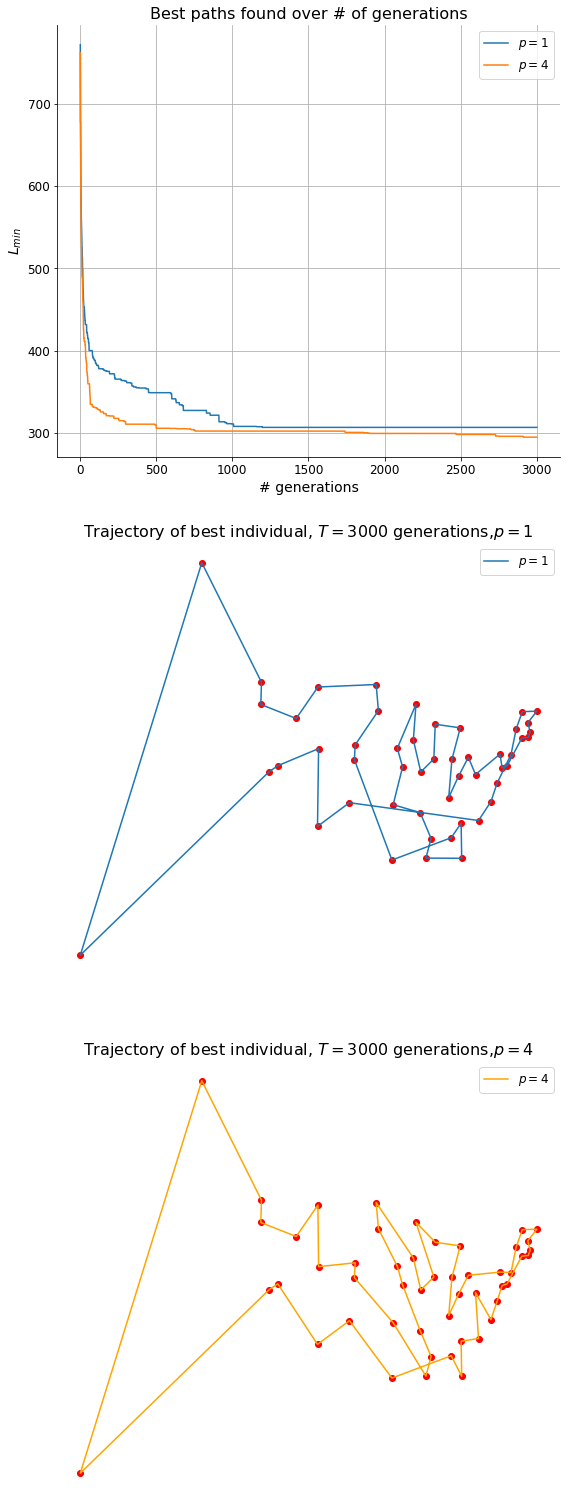

In [2]:
fig,ax = plt.subplots(3,1,figsize=(9,27))
f=open("world_bestdist1p.dat",'r')
data=f2plot(f,2,2999)
ax[0].plot(data[0],data[1],label='$p=1$')
f=open("world_bestdist4p.dat",'r')
data=f2plot(f,2,2999)
ax[0].plot(data[0],data[1],label='$p=4$')
ax[0].legend()
ax[0].set_title('Best paths found over # of generations')
ax[0].set_xlabel('# generations')
ax[0].set_ylabel('$L_{min}$')
ax[0].grid(True)


f=open("xybest1p.dat",'r')
data1p=f2plot(f,2,51)
ax[1].plot(data1p[0],data1p[1],label='$p=1$')
ax[1].set_title("Trajectory of best individual, $T=3000$ generations,$p=1$")

f=open("American_capitals.map.in",'r')
datac=f2plot(f,2,50)
ax[1].scatter(datac[0],datac[1],color='red')
ax[2].scatter(datac[0],datac[1],color='red')
f=open("xybest4p.dat",'r')
data4p=f2plot(f,2,51)

ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax[1].legend()
ax[1].axis('off')

ax[2].set_title("Trajectory of best individual, $T=3000$ generations,$p=4$")
ax[2].plot(data4p[0],data4p[1],label='$p=4$',color='orange')

ax[2].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax[2].legend()
ax[2].axis('off')

plt.show()

We now implement a "migration". Every $N_{migr}$ generations, two randomly chosen populations will exchange randomly their best individual. Let's compare the results with the previous ones.

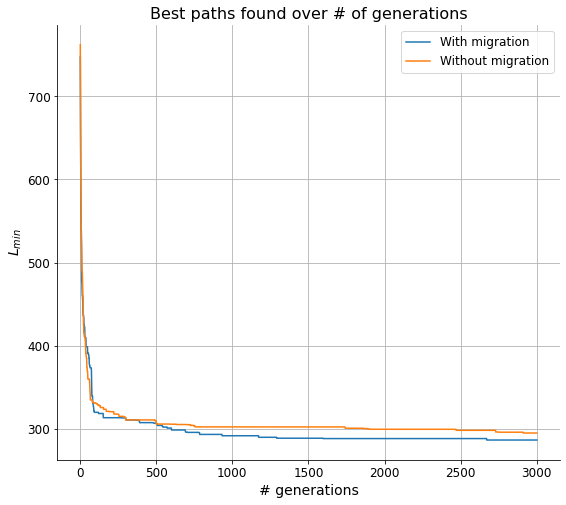

In [3]:
fig,ax = plt.subplots(1,figsize=(9,8))
f=open("world_bestdist4pm.dat",'r')
data=f2plot(f,2,2999)
ax.plot(data[0],data[1],label='With migration')
f=open("world_bestdist4p.dat",'r')
data=f2plot(f,2,2999)
ax.plot(data[0],data[1],label='Without migration')
ax.legend()
ax.set_title('Best paths found over # of generations')
ax.set_xlabel('# generations')
ax.set_ylabel('$L_{min}$')
ax.grid(True)

### Final implementation
We will use these settings: $\beta =0.1\ ;\  N=4500 \ ;\ N_{migr}=30 $ on 4 different continents.

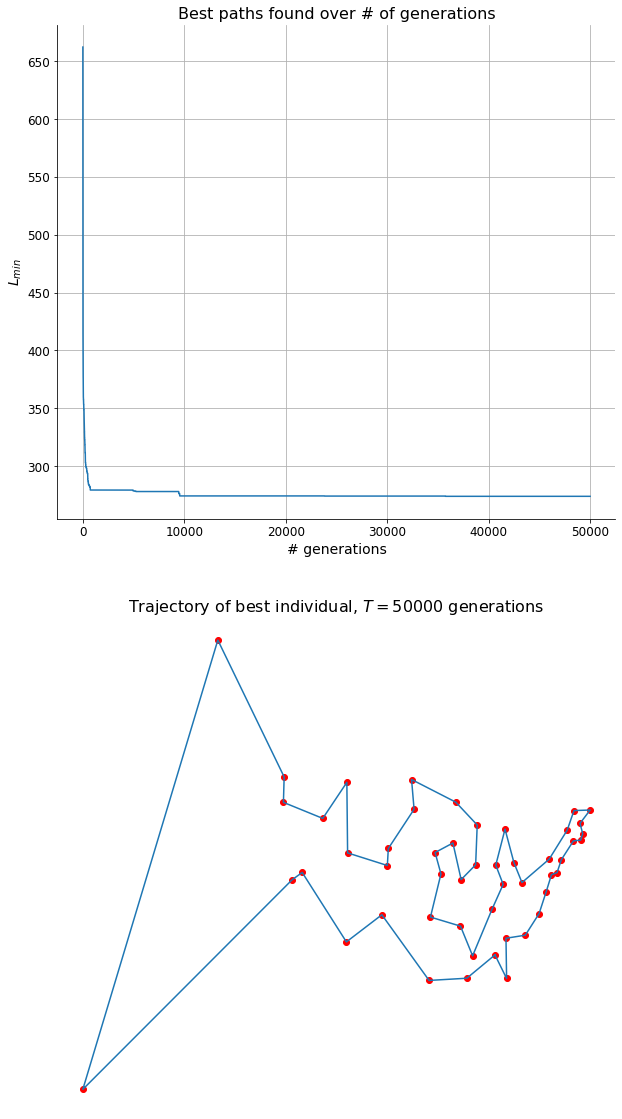

In [14]:
fig,ax = plt.subplots(2,1,figsize=(10,20))
f=open("world_bestdist_fin.dat",'r')
data=f2plot(f,2,49999)
ax[0].plot(data[0],data[1])
#ax[0].legend()
ax[0].set_title('Best paths found over # of generations')
ax[0].set_xlabel('# generations')
ax[0].set_ylabel('$L_{min}$')
ax[0].grid(True)


f=open("xybest_fin.dat",'r')
data1p=f2plot(f,2,51)
ax[1].plot(data1p[0],data1p[1])
ax[1].set_title("Trajectory of best individual, $T=50000$ generations")

f=open("American_capitals.map.in",'r')
datac=f2plot(f,2,50)
ax[1].scatter(datac[0],datac[1],color='red')
f=open("xybest4p.dat",'r')
data4p=f2plot(f,2,51)

ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#ax[1].legend()
ax[1].axis('off')

plt.show()


### Final remark
The curve of the best distance found seems essentially flat starting from $T \simeq 10000$ generations, however there is a small yet frustrating last step the evolution needs to take, before reaching absolute minimum: in fact, it tends to have problems in the closely clustered north-east. To solve that, we need to wait $\sim 20000$ generations. This long time might be due to the fact that small advantages are harder to propagate when compared to bigger ones (e.g. the big trips on the ocean on the west are usually not problematic)   

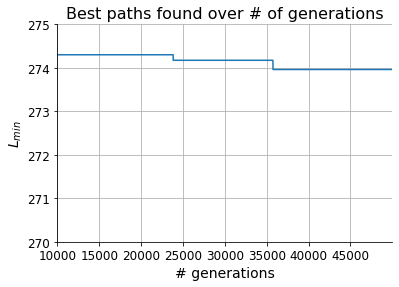

In [21]:
f=open("world_bestdist_fin.dat",'r')
data=f2plot(f,2,49999)
plt.plot(data[0],data[1])
#ax[0].legend()
plt.xlim(10000,49999)
plt.ylim(270,275)
plt.title('Best paths found over # of generations')
plt.xlabel('# generations')
plt.ylabel('$L_{min}$')
plt.grid(True)